In [2]:
import pandas as pd
import numpy as np
import os
import re
import glob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%%time
# Load data #
data=pd.read_csv("merged.csv")

#  Print columns of dataset with missing values #
list = data.columns[data.isna().any()].tolist()
print(list)

# Fill NA values with mean of the corresponding column #
for i in list:
    print(i)
    print(data.isna().sum())                      
    data[i].fillna(data[i].mean(), inplace=True)  

[]
CPU times: user 2min 44s, sys: 2.76 s, total: 2min 47s
Wall time: 2min 47s


In [4]:
# Extract all the top features prioritized by the three MLP architectures (MLP1H, MLP2H, MLP3H) in all rounds of their training #
cols=np.loadtxt("scaled/MLP-output/MLPallnonred-kd-featurelist.csv", dtype=str, delimiter=",")

# Set feature and target columns #
features = data.filter(cols)
target = data['labels']
print(features.head(n=5))
print(target.head(n=5))

# Train test split #
misel = SelectKBest(mutual_info_classif, k="all")

    191-238  162-208  191-233  128-192  105-183  157-236   92-182    70-91  \
0  11.97870  14.5808  8.51649  24.3121  21.7411  17.6273  20.4339  19.1549   
1  10.01410  14.2115  9.49887  23.8066  21.6799  16.2516  18.5337  19.0263   
2  10.73540  14.5949  9.15612  24.4845  23.3764  15.4941  20.6636  19.0869   
3  11.47800  14.2701  9.38102  24.8525  22.1840  16.2799  20.4828  18.9013   
4   9.11293  14.4493  8.82939  24.2904  22.0445  16.2966  19.0758  19.9366   

     50-71  131-206  ...  110-180  184-280   52-189   80-162  190-221  \
0  12.8569  26.9916  ...  16.1394  27.5678  16.9885  14.1544  6.47154   
1  12.8914  27.8652  ...  16.9871  26.9463  17.1251  14.5367  7.05931   
2  12.8550  26.6545  ...  17.5700  28.3993  16.9502  13.1655  7.15194   
3  12.3914  27.1760  ...  17.8119  27.6519  17.8729  13.4918  6.24151   
4  13.0122  27.0934  ...  17.2710  27.8172  17.4951  13.2132  5.91887   

    41-183  186-216  189-198   41-206  147-184  
0  16.4149  16.8953  16.3082  32.5972  26.4

In [6]:
def miscore(X,y,seed):
    misel.fit(X, y)
    scores = misel.scores_
    mi_scores=pd.Series(scores, name="MI Scores", index=X.columns)
    mi_scores=mi_scores.sort_values(ascending=False)
    mi_scores.to_csv("miscores-MLPderivedfeatures"+str(seed)+".csv",sep=",")
    return mi_scores

In [7]:
def plot_mi_scores(seed, scores):
    scores = scores[:30].sort_values(ascending=False)
    width = np.arange(len(scores))
    ticks = scores[:30].index
    plt.bar(width, scores, color="mediumturquoise")
    plt.xticks(width, ticks, rotation='vertical')
    plt.title("Mutual Information Scores")
    plt.savefig("MI-MLPderivedfeatures"+str(seed)+".png", dpi=300)

/home/nibedita/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


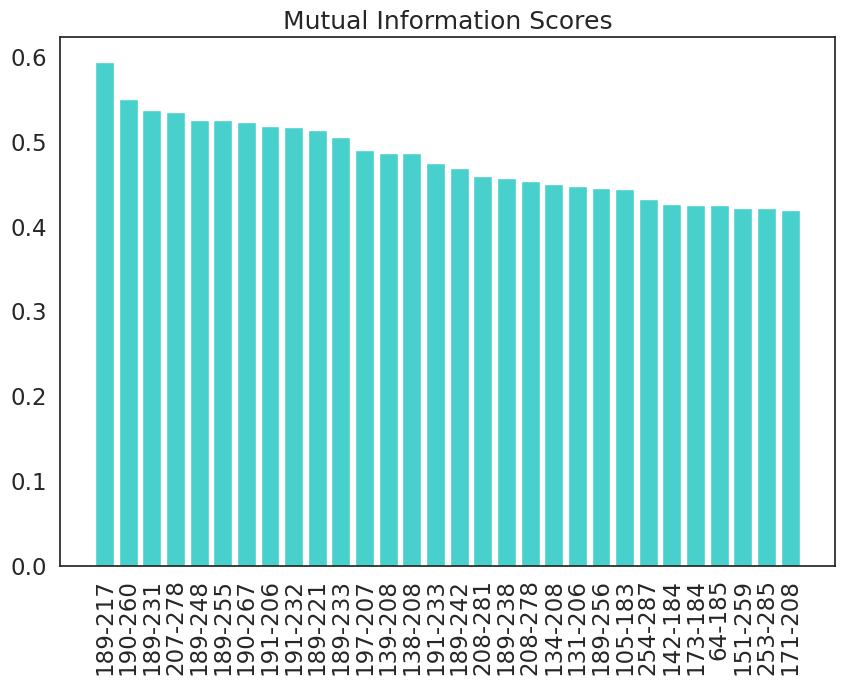

In [11]:
# Estimate on whole data without scaling #
mi_scores=miscore(features,target,12)
plt.figure(dpi=100, figsize=(10, 7))
plot_mi_scores(1, mi_scores)